In [103]:
### Imports
import warnings
import logging

import matplotlib
import scipy

import pandas as pd

import numpy as np
import scipy.stats as stats

from matplotlib import pyplot as plt
### Configuration
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
logging.getLogger("matplotlib").setLevel(logging.ERROR)

plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "cmr10"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['font.size'] = 12

In [102]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
df = pd.read_csv("~/Downloads/runs_auto_augment_cifar_10_40_epochs_normalize_cosine_warmup.csv")


In [7]:
df

,Wall time,Step,Value
0,1.712568e+09,0,0.4418
1,1.712568e+09,1,0.5611
2,1.712569e+09,2,0.5894
3,1.712569e+09,3,0.6492
4,1.712569e+09,4,0.6501
5,1.712569e+09,5,0.6793
6,1.712569e+09,6,0.7056
7,1.712570e+09,7,0.7221
8,1.712570e+09,8,0.6654
9,1.712570e+09,9,0.6992


In [44]:
def plot_csv(csv_file, title=None, cols=None):
    # Read the CSV file into a DataFrame

    if isinstance(csv_file, str):
        if csv_file.endswith(".csv"):
            df = pd.read_csv(csv_file)
        elif csv_file.endswith(".xlsx"):
            df = pd.read_excel(csv_file)

        file_name = csv_file.split("/")[-1]

    elif isinstance(csv_file, list):
        df = pd.concat([pd.read_csv(file) for file in csv_file], axis=1)

        file_name = "_".join([file.split("/")[-1] for file in csv_file])

    display(df.head())

    # Get the file name from the CSV file path
    
    file_name = file_name.removeprefix("runs_")
    file_name = file_name.removesuffix(".csv")
    file_name = file_name.removesuffix(".xlsx")
    file_name = file_name.replace("_", " ")

    # Plot each column (except "Step") on the y-axis
    if cols:
        df = df[cols]

    for column in df.columns:
        if column == "Wall time":
            continue
        elif column != "Epoch":
            plt.plot(df["Epoch"], df[column], label=column)

    # Set the title of the plot as the file name

    if not title:
        plt.title(file_name)

    else:
        plt.title(title)

    # Set the x-axis label
    plt.xlabel("Step")

    # Set the y-axis label
    plt.ylabel("Value")

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


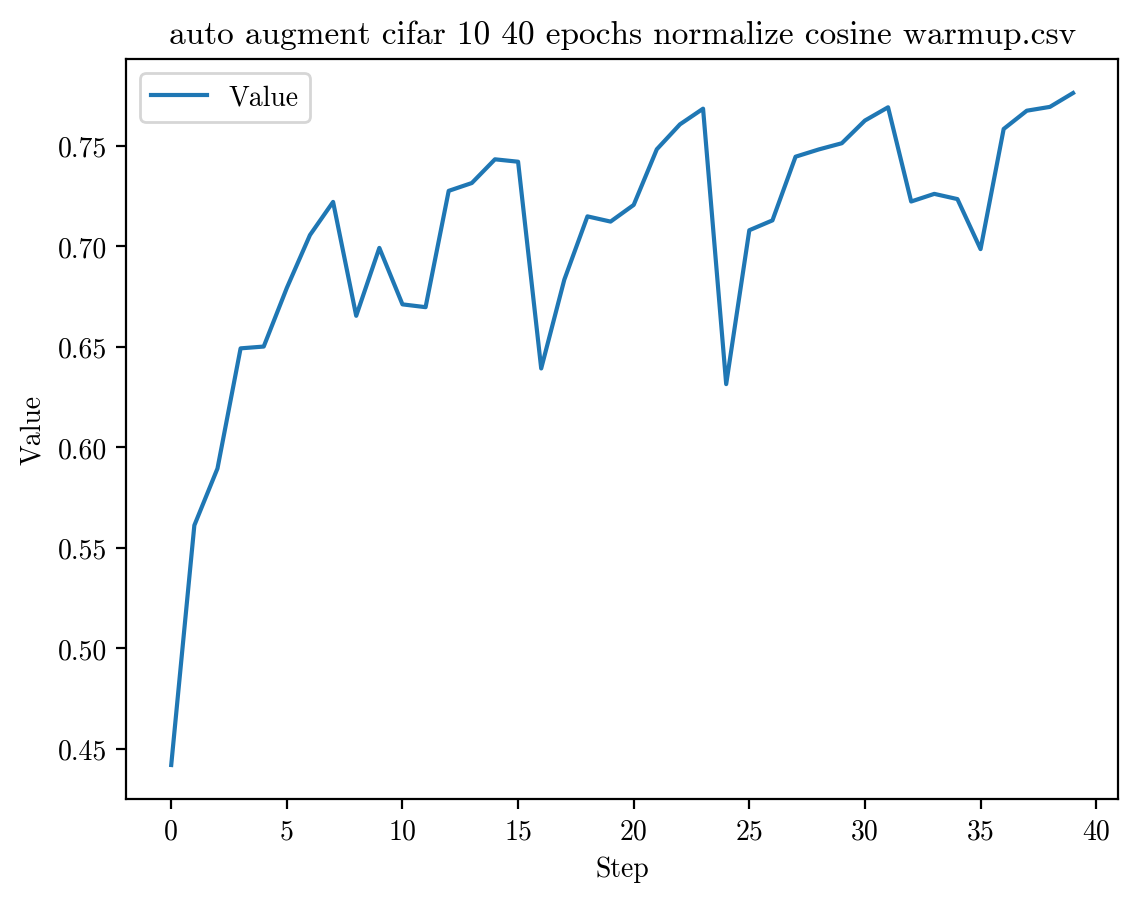

In [20]:
plot_csv("~/Downloads/runs_auto_augment_cifar_10_40_epochs_normalize_cosine_warmup.csv")

### Sweeps

,Epoch,MiniResnet2111,MiniResnet1211,MiniResnet3111,MiniResnet2211,MiniResnet1121
0,1,0.457,0.454,0.452,0.468,0.463
1,2,0.638,0.640,0.640,0.665,0.647
2,3,0.713,0.722,0.714,0.735,0.729
3,4,0.756,0.766,0.761,0.776,0.771
4,5,0.788,0.791,0.789,0.801,0.799


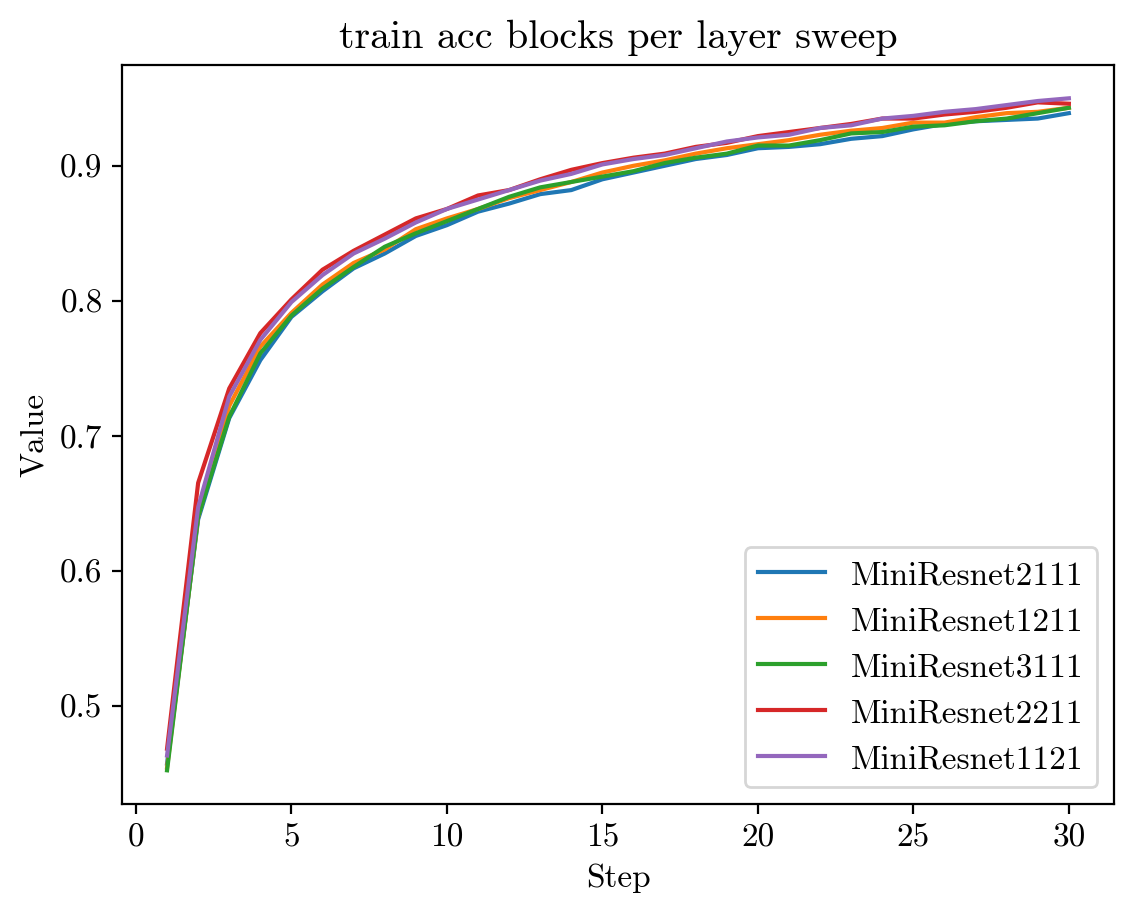

In [131]:
plot_csv("../data/drive-download-20240412T193921Z-001/TrainAccCurves/train_acc_blocks_per_layer_sweep.csv")

,Epoch,MiniResnet2111,MiniResnet1211,MiniResnet3111,MiniResnet2211,MiniResnet1121
0,1,0.534,0.525,0.526,0.555,0.585
1,2,0.653,0.665,0.609,0.586,0.660
2,3,0.708,0.718,0.746,0.711,0.725
3,4,0.744,0.773,0.774,0.757,0.772
4,5,0.791,0.765,0.762,0.798,0.792


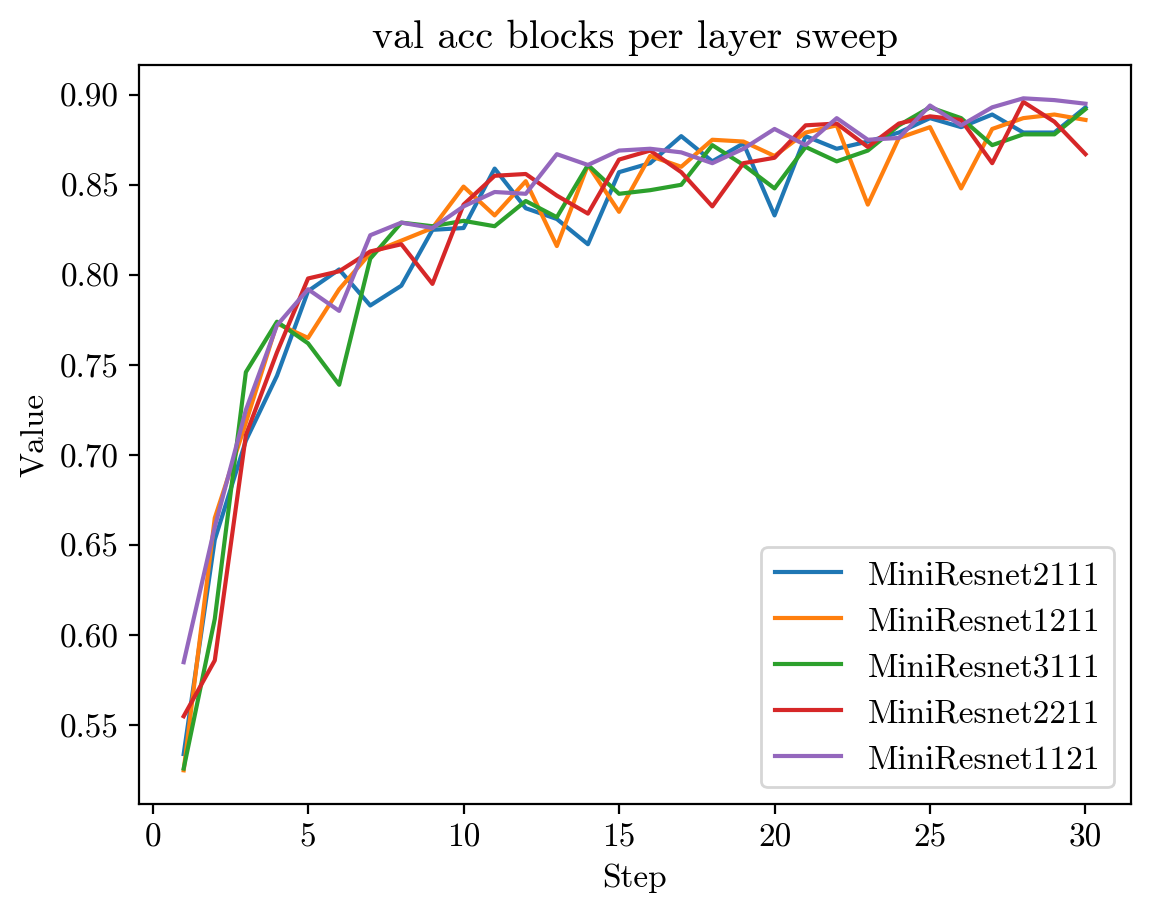

In [132]:
plot_csv("../data/drive-download-20240412T193921Z-001/ValAccCurves/val_acc_blocks_per_layer_sweep.csv")

,Epoch,MiniResnet2111,MiniResnet1211,MiniResnet3111,MiniResnet2211,MiniResnet1121
0,1,1.475,1.473,1.492,1.447,1.461
1,2,1.015,1.014,1.010,0.942,0.989
2,3,0.816,0.793,0.812,0.751,0.775
3,4,0.692,0.677,0.688,0.641,0.659
4,5,0.609,0.604,0.604,0.570,0.577


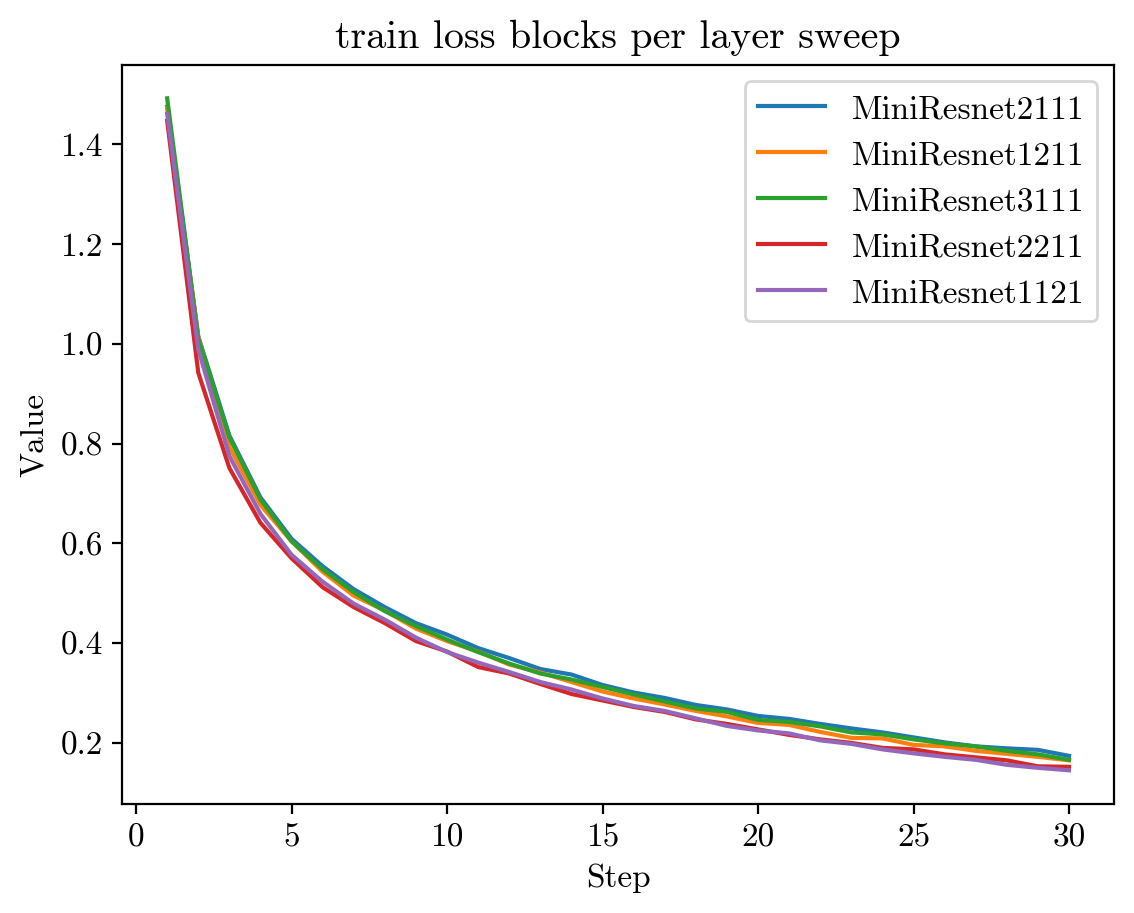

In [133]:
plot_csv("../data/drive-download-20240412T193921Z-001/TrainLossCurves/train_loss_blocks_per_layer_sweep.csv")

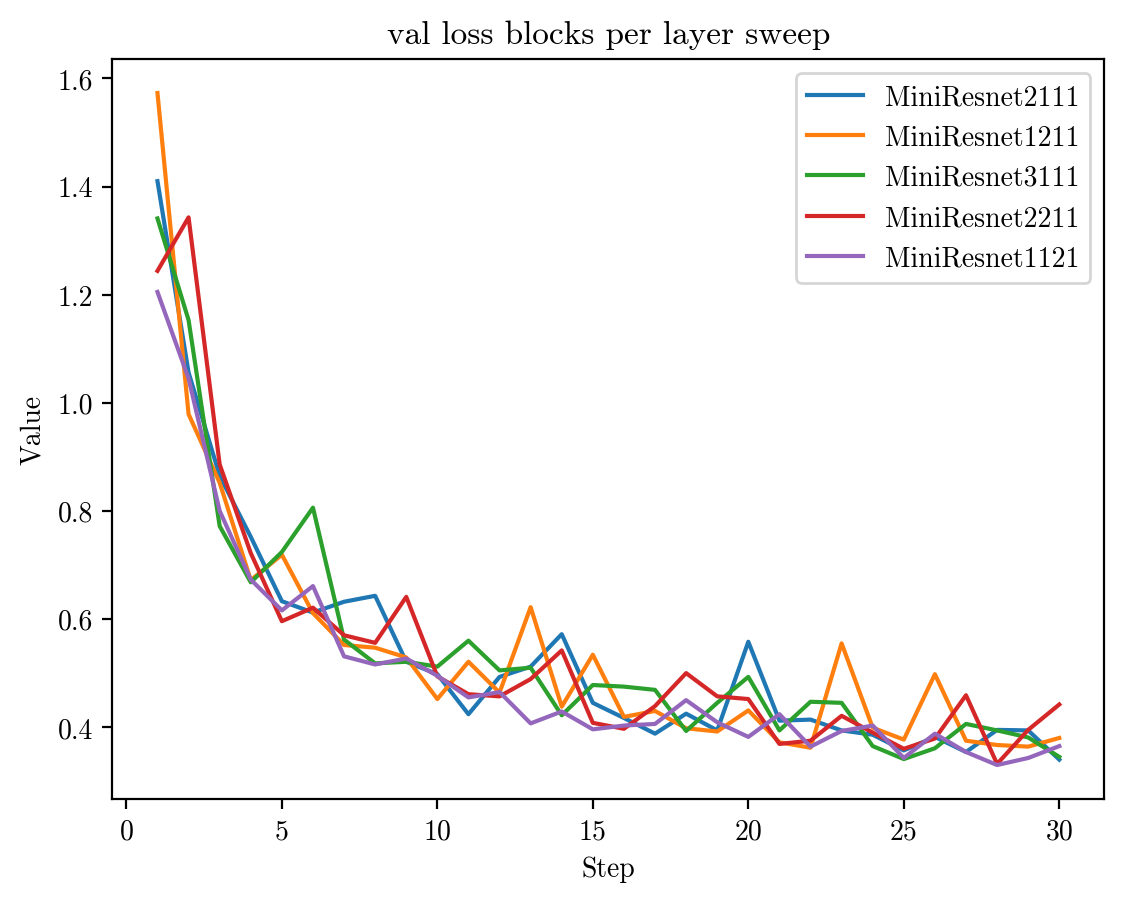

In [30]:
plot_csv("../data/drive-download-20240412T193921Z-001/ValLossCurves/val_loss_blocks_per_layer_sweep.csv")

### BaseLine vs Channel Diffs vs Sharpness

In [134]:
df1 = pd.read_csv("../data/drive-download-20240412T193921Z-001/TrainAccCurves/baseline_train_acc.csv")
df2 = pd.read_csv("../data/drive-download-20240412T193921Z-001/TrainAccCurves/channel_train_acc.csv")
df3 = pd.read_excel("../data/drive-download-20240412T193921Z-001/TrainAccCurves/train_acc_sharpness_factor_4.5.xlsx")

In [135]:
df1.columns = ["Epoch", "BaseLine"]
df2.columns = ["Epoch", "Channel Reduction"]
df3.columns = ["Epoch", "Sharpness Factor"]

In [136]:
pd.concat([df1, df2[["Channel Reduction"]], df3[["Sharpness Factor"]]], axis=1)

,Epoch,BaseLine,Channel Reduction,Sharpness Factor
0,1.0,0.455,0.406,0.297
1,2.0,0.630,0.567,0.432
2,3.0,0.707,0.647,0.505
3,4.0,0.749,0.692,0.600
4,5.0,0.779,0.723,0.654
...,...,...,...,...
195,NaN,NaN,0.996,NaN
196,NaN,NaN,0.995,NaN
197,NaN,NaN,0.996,NaN
198,NaN,NaN,0.996,NaN


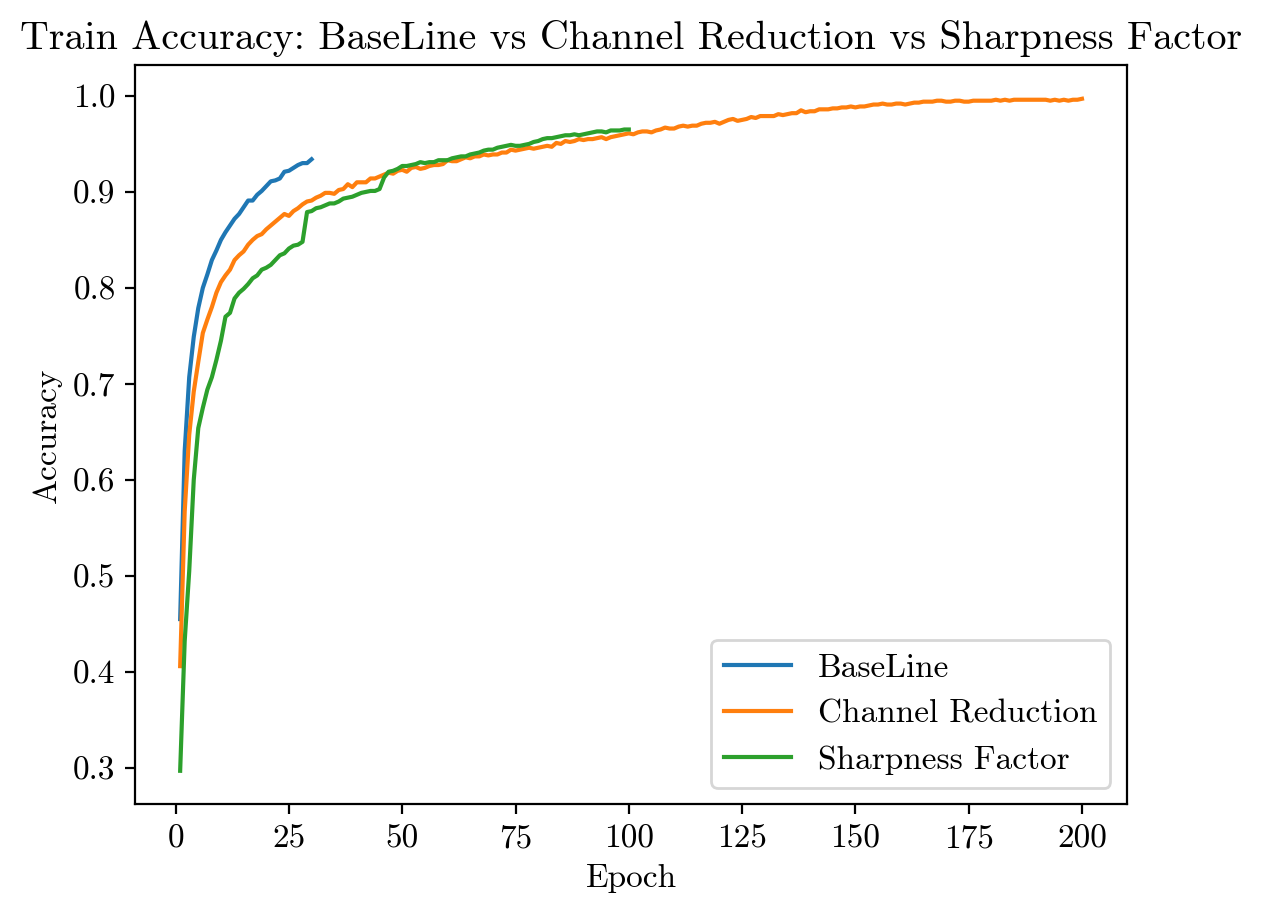

In [137]:
plt.plot(df1["Epoch"], df1["BaseLine"], label="BaseLine")
plt.plot(df2["Epoch"], df2["Channel Reduction"], label="Channel Reduction")
plt.plot(df3["Epoch"], df3["Sharpness Factor"], label="Sharpness Factor")

plt.title("Train Accuracy: BaseLine vs Channel Reduction vs Sharpness Factor")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [109]:
df1 = pd.read_csv("../data/drive-download-20240412T193921Z-001/ValAccCurves/baseline_val_acc.csv")
df2 = pd.read_csv("../data/drive-download-20240412T193921Z-001/ValAccCurves/channel_val_acc.csv")
df3 = pd.read_excel("../data/drive-download-20240412T193921Z-001/ValAccCurves/val_acc_sharpness_factor_4.5.xlsx")

In [112]:
df1.columns = ["Epoch", "BaseLine"]
df2.columns = ["Epoch", "Channel Reduction"]
df3.columns = ["Epoch", "Sharpness Factor"]

In [113]:
pd.concat([df1, df2[["Channel Reduction"]], df3[["Sharpness Factor"]]], axis=1)

,Epoch,BaseLine,Channel Reduction,Sharpness Factor
0,1.0,0.547,0.537,0.395
1,2.0,0.651,0.625,0.468
2,3.0,0.706,0.698,0.508
3,4.0,0.754,0.705,0.571
4,5.0,0.765,0.721,0.670
...,...,...,...,...
195,NaN,NaN,0.939,NaN
196,NaN,NaN,0.941,NaN
197,NaN,NaN,0.941,NaN
198,NaN,NaN,0.942,NaN


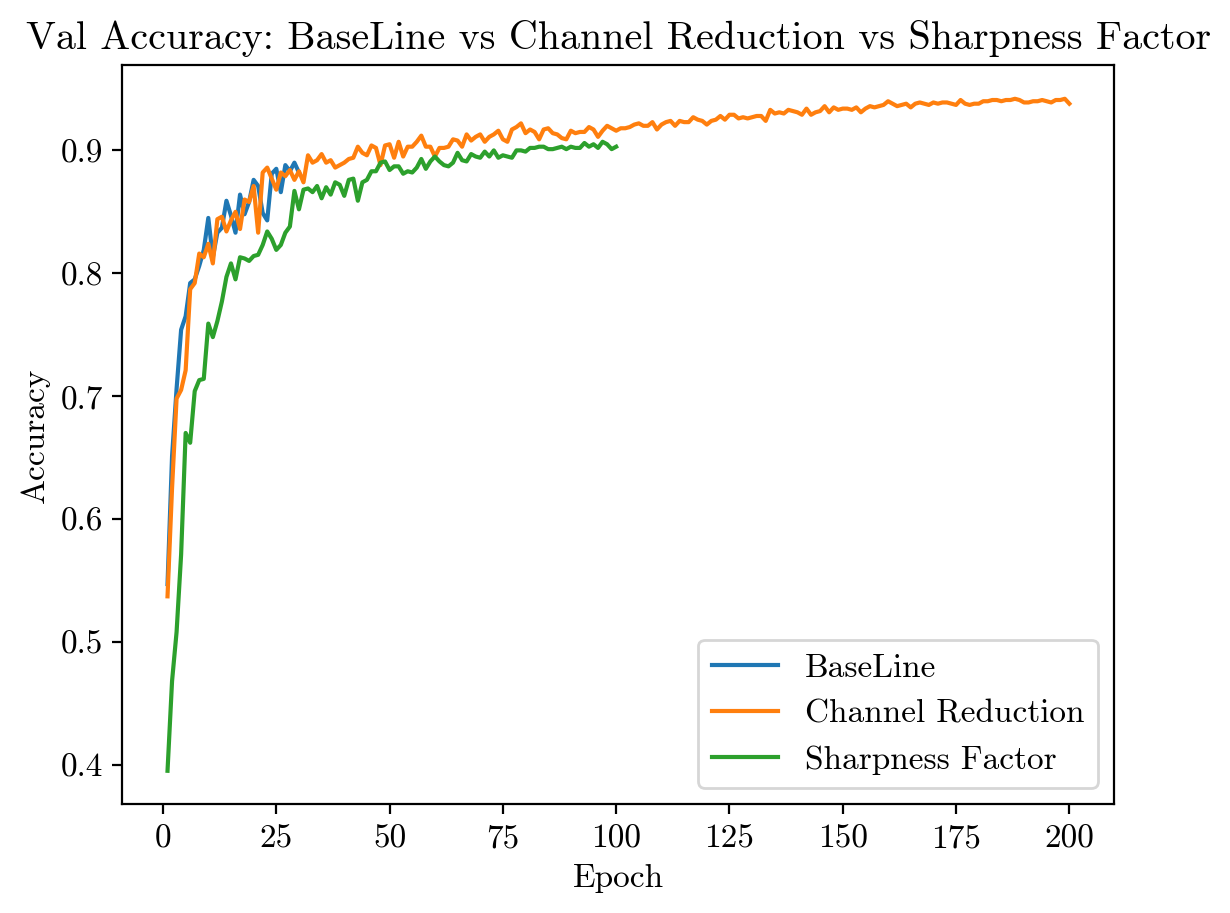

In [114]:
plt.plot(df1["Epoch"], df1["BaseLine"], label="BaseLine")
plt.plot(df2["Epoch"], df2["Channel Reduction"], label="Channel Reduction")
plt.plot(df3["Epoch"], df3["Sharpness Factor"], label="Sharpness Factor")

plt.title("Val Accuracy: BaseLine vs Channel Reduction vs Sharpness Factor")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

### Optimizer Changes

In [127]:
import os

def read_csv_files(path, prefix="train_acc_runs"):
    dfs = []
    for file in os.listdir(path):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(path, file))
            df = df[["Step", "Value"]]

            file = file.removesuffix(".csv")
            file = file.removeprefix(prefix)
            file = file.replace("_", " ")
            df = df.rename(columns={"Step": "Epoch", "Value": file})
            dfs.append(df)
    return pd.concat(dfs, axis=1)

df_combined = read_csv_files("../data/optimizer_data/TrainAccCurves")
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

Text(0, 0.5, 'Accuracy')

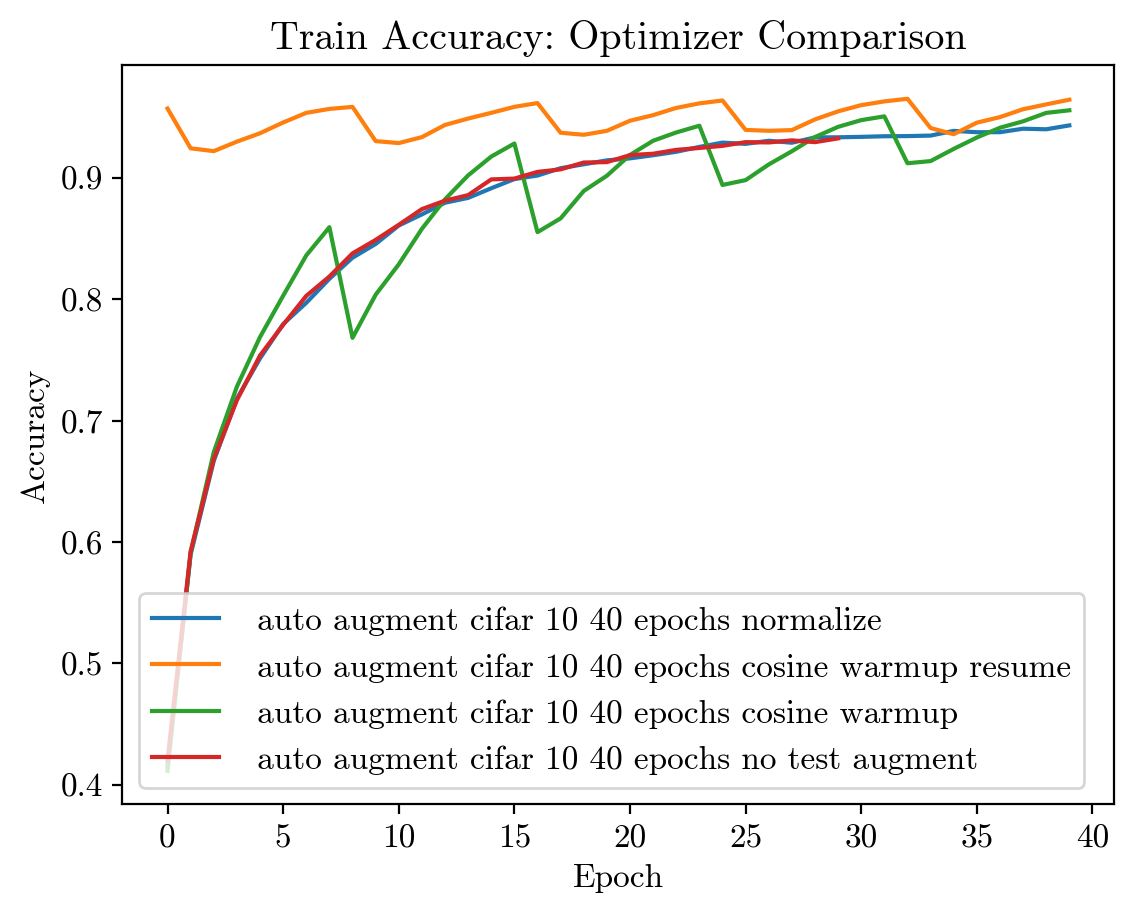

In [126]:
df_combined.plot(
    x="Epoch",
    y=df_combined.columns[1:],
)

plt.title("Train Accuracy: Optimizer Comparison")
plt.xlabel("Epoch")     
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

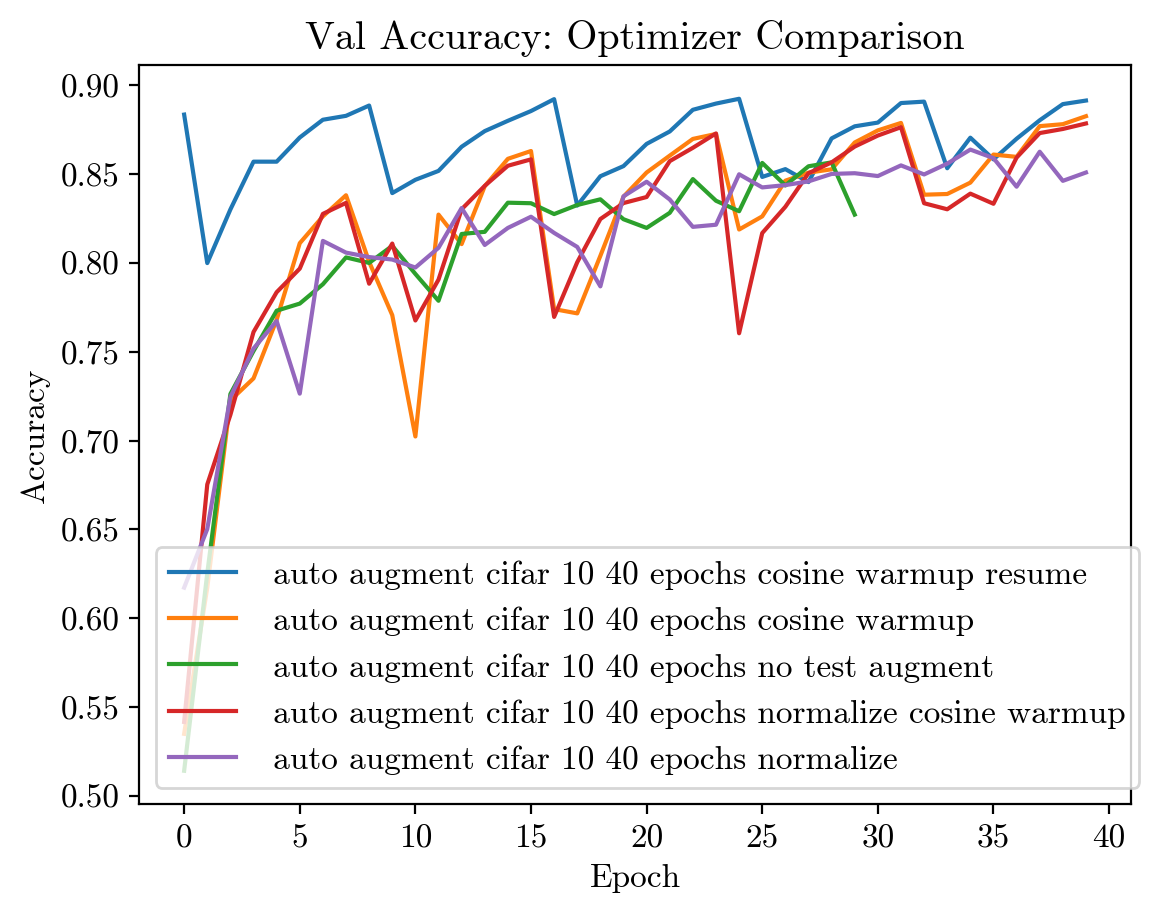

In [130]:
df_combined = read_csv_files("../data/optimizer_data/ValAccCurves", prefix="val_acc_runs")
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

df_combined.plot(
    x="Epoch",
    y=df_combined.columns[1:],
)

plt.title("Val Accuracy: Optimizer Comparison")
plt.xlabel("Epoch")     
plt.ylabel("Accuracy")